In [16]:
import os
import os.path
import sys
sys.path.insert(0, os.path.join(os.pardir, 'sparat'))

import psyrun.io

from data_processing.rat import load_rat_items
from data_processing.generate_association_matrix import load_assoc_mat

%matplotlib inline

In [17]:
data = psyrun.io.load_dict_h5(os.path.join(os.pardir, 'data', 'neural-accuracy.h5'))
data.keys()

['m_sim', 'seed', 'neurons_per_dimension']

In [18]:
assoc, i2w, w2i = load_assoc_mat(os.path.join(
    os.pardir, 'data', 'associationmatrices'), 'freeassoc_asymmetric')

In [19]:
rat_items = load_rat_items(os.path.join(os.pardir, 'data', 'rat', 'example.txt'))

In [20]:
ground_truth = np.array([np.sum([assoc[w2i[c]] for c in item.cues], axis=0) for item in rat_items])

In [21]:
rmse = np.mean(np.square(data['m_sim'] - ground_truth[None, : , :]), axis=(1, 2))

In [22]:
sorting = np.argsort(data['neurons_per_dimension'])

In [23]:
sns.set('paper', 'ticks')

column_width_pt = 243.91125
pt2inch = 1. / 72.27
column_width_inch = pt2inch * column_width_pt

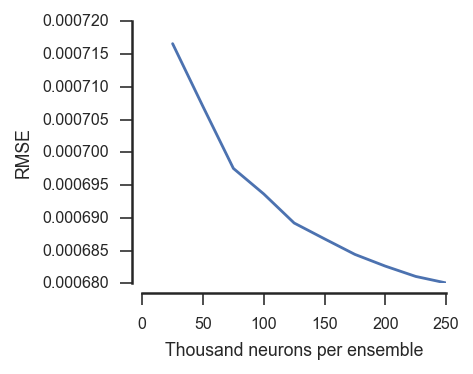

In [57]:
fig = plt.figure(figsize=(column_width_inch, 0.8 * column_width_inch))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data['neurons_per_dimension'][sorting] * 5018 / 1000, rmse[sorting])
ax.set_xlabel("Thousand neurons per ensemble")
ax.set_ylabel("RMSE")

sns.despine(offset=5)
fig.tight_layout()

In [25]:
fig.savefig(os.path.join(os.pardir, 'figures', 'accuracy.pdf'))